# 허프만 알고리즘(Huffman Coding Compression Algorithm)
## 개요
- 고정 길이 인코딩(fixed-length encoding) vs 가변 길이 인코딩(variable-length encoding)
- 접두사 규칙(prefix rules)
- Huffman code(tree)
- 활용
<br/> <br/>



### 고정 길이 인코딩 vs 가변 길이 인코딩
- 고정 길이 인코딩: 문자당 비트 수(code word의 길이)가 고정. e.g.) 아스키코드 - 8bit <br/>
- 가변 길이 인코딩: 각 문자당 비트 수(code word의 길이)가 다름 <br/>
<br/> <br/> <br/> <br/>

### 문자를 저장하는 데 필요한 공간을 줄이는 방법: 가변 길이 인코딩을 사용
e.g.) 6개의 문자 a, b, c, d, e, f로 이루어진 파일이 있을 때, 문자의 총 개수는 100,000개이고 각 문자의 등장 횟수는 Frequency <br/>

||a|b|c|d|e|f|
|---------|----|----|----|----|----|----|
|Frequency|45|13|12|16|9|5|
|Fixed-length code|000|110|010|011|100|101|
|Variable-length|0|101|100|111|1101|1100|
<br/> 

- 고정 길이 인코딩: 각 문자를 표현하기 위해 3비트씩 필요하므로 총 300,000 비트
- 가변 길이 인코딩: (45x1+ 13x3 + 12x3 + 16x3 + 9x4 + 5x4) x 1000 = 224,000 비트
- 문제점: 디코딩을 어떻게 할 것인가?

<br/> <br/>

e.g.) string = "aabacdab" <br/>
빈도 수가 각각 a:4, b:2, c:1, d:1인 걸 알 수 있음 <br/>
빈도 수가 높은 문자에 더 적은 수의 비트를 할당 <br/>
<br/>

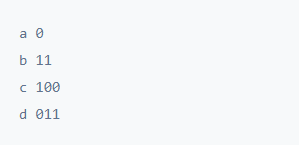


<br/> 

인코딩: "aabacdab" -> 00110100011011 (0|0|11|0|100|011|0|11) <br/>

디코딩: 00110100011011 -> ? <br/>

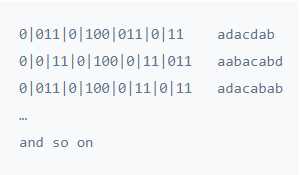
<br/>

**즉, 여러 문자열로 해석될 여지가 있어 모호함** <br/>
해결 방법: **접두사 규칙(prefix rules)** <br/>


**접두사 규칙(prefix rules)**: 어떤 codeword(비트)도 다른 codeword의 접두사가 아니어야 함

<br/><br/>
### Huffman code(prefix code): 어떤 codeword(비트)도 다른 codeword의 prefix가 되지 않는 코드
- unique하게 해석(디코딩)이 가능 <br/>

e.g.) string = "aabacdab"
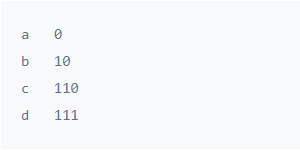
a가 d의 접두사가 아니므로 혼동의 여지가 없음
<br/><br/> <br/>

## Huffman coding
- 무손실 압축 알고리즘
- 출현 문자의 빈도수를 바탕으로 Priority Queue(min heap)을 구성해 압축하는 알고리즘
- 사진(JPEG), 미디어 파일(MPEG) 압축, Unix 파일 압축에 사용됨
- tree 구성 / encoding / decoding

### Huffman tree
- priority queue로 구성 <br/>
A, B, C, D, E로 이루어진 문자열이 있고 각 문자의 frequency가 15, 7, 6, 6, 5일 때
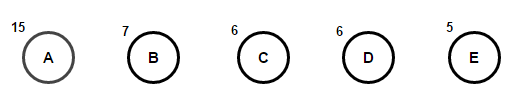
<hr>

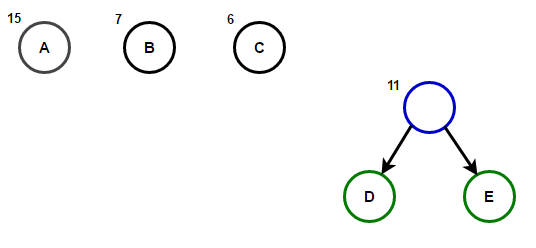
<hr>

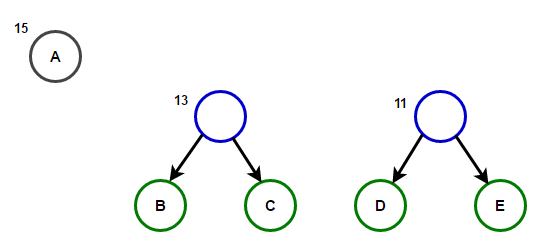
<hr>

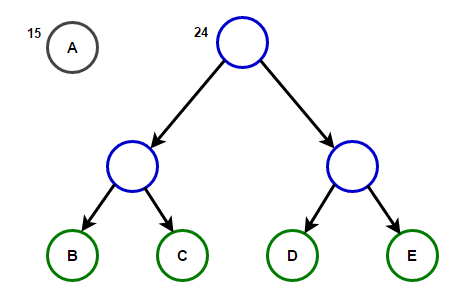
<hr>

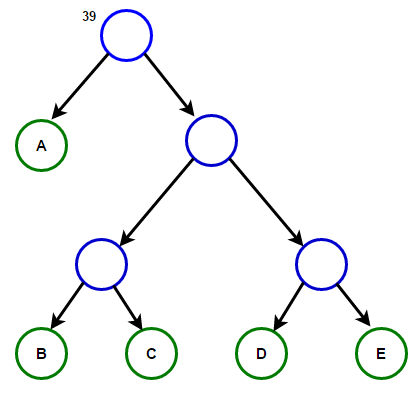

<br/>

**루트에서 각 리프 노드까지의 경로는 각 리프 노드의 문자에 해당하는 최적의 prefix code(Huffman code)를 저장함**
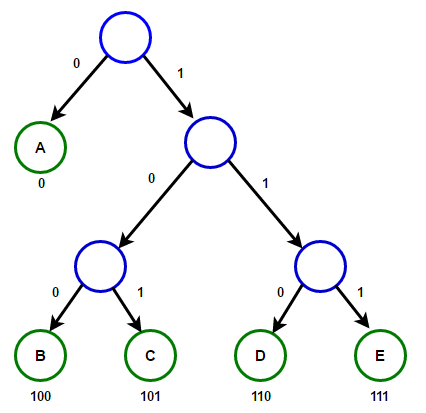


### tree 구성
1. 각 문자에 해당하는 leaf node를 생성하고 Priority Queue에 추가

2. 큐에 원소가 두 개 이상 있을 경우 다음을 반복:
    - priority가 높은(빈도가 낮은) 두 개 노드를 큐에서 제거 (greedy)
    - 이 두 노드를 자식으로 하고 두 노드의 빈도 합을 가지는 새로운 노드 생성
    - 이 새 노드를 priority queue에 추가
3. 남은 하나의 노드가 root node가 되고 트리가 완성

<br/> <br/>

### Encoding
- tree의 root부터 순회
- 왼쪽 자식을 탐색할 때는 0, 오른쪽 자식을 탐색할 때는 1을 출력
- leaf node에 해당 경로까지의 비트열을 저장

### Decoding
- tree의 root부터 순회
- codeword가 0이면 왼쪽 자식 Node를 탐색, 1이면 오른쪽 자식 Node를 탐색
- 트리의 끝까지 순회했을 때, 해당 노드에 저장된 알파벳이 디코딩 된 문자

<br/> <br/> <br/> <br/>

## Complexity: O(nlogn)
worst: 힙을 이용해 트리에 가중치를 저장하는 과정 = O(logn), 이를 n번 반복하므로 **O(nlogn)** <br/>
best: 가중치가 이미 정렬되어 있는 경우 = O(n)

참고
https://www.techiedelight.com/huffman-coding/
https://yesdoing.github.io/%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98/2018/04/17/compression.html
https://velog.io/@kksshh0612/%ED%97%88%ED%94%84%EB%A7%8C-%EC%9D%B8%EC%BD%94%EB%94%A9%EB%94%94%EC%BD%94%EB%94%A9
https://home.cse.ust.hk/faculty/golin/COMP271Sp03/Notes/MyL17.pdf

In [15]:
# heapq: 이진 트리 기반의 min heap
import heapq
from heapq import heappop, heappush
 
# 노드
class Node:
    # 각 노드는 문자, 빈도, left child, right child를 가짐
    def __init__(self, ch, freq, left=None, right=None):
        self.ch = ch      
        self.freq = freq   
        self.left = left
        self.right = right
 
    # __lt__ 오버라이드
    # 노드의 대소 관계 비교는 freq를 기준으로
    def __lt__(self, other):
        return self.freq < other.freq


# huffman tree를 탐색하며 huffman code를 저장
def encode(root, s, huffman_code):
 
    if root is None:
        return
 
    # leaf node이면
    if root.left is None and root.right is None:
        if len(s) > 0:
            huffman_code[root.ch] = s
        else:
            huffman_code[root.ch] = '1'
 
    encode(root.left, s + '0', huffman_code)      # 왼쪽 서브트리 탐색
    encode(root.right, s + '1', huffman_code)     # 오른쪽 서브트리 탐색
 
 
# huffman tree를 탐색하며 decoding
def decode(root, index, s):              # s: 인코딩 문자열
 
    if root is None:
        return index
 
    # laef node이면
    if root.left is None and root.right is None:
        print(root.ch, end='')
        return index
 
    index = index + 1
    
    if s[index] == '0':
        root = root.left
    else:
        root = root.right
        
    return decode(root, index, s)
 

# huffman tree를 만들고 decoding 수행
def huffmanCoding(text):
 
    # 각 문자와 frequency를 딕셔너리에 저장
    freq = {i: text.count(i) for i in set(text)}
 
    # priority queue 생성
    pq = [Node(k, v) for k, v in freq.items()]
    heapq.heapify(pq)
 
    # 큐에 두 개 이상의 원소가 있을 때
    while len(pq) > 1:
 
        # priority가 높은(빈도가 낮은) 두 개 노드를 큐에서 제거
        left = heappop(pq)
        right = heappop(pq)
 

        #두 노드를 자식으로 하고 두 노드의 빈도 합을 가지는 새로운 노드를 생성하고 pq에 추가 
        total = left.freq + right.freq
        heappush(pq, Node(None, total, left, right))
 
    root = pq[0]
 
    # encoding
    huffmanCode = {}
    encode(root, '', huffmanCode)
 
    # huffman code
    print('원본 텍스트: ', text)
    print()
    print('빈도수: ', freq)
    print()
    print('Huffman Code: ', huffmanCode)
    print()
 
    # 인코딩 결과
    s = ''
    for c in text:
        s += huffmanCode.get(c)
 
    print('인코딩 결과: ', s)
    
    # decoding
    print('디코딩 결과: ', end=' ')
 
    # leaf node이면
    if root.left is None and root.right is None:
        # a, aa, aaa같은 경우
        while root.freq > 0:
            print(root.ch, end='')
            root.freq = root.freq - 1
    else:
        index = -1
        while index < len(s) - 1:
            index = decode(root, index, s)
                       
        
if __name__ == "__main__":
    text = 'aaabbbbbbcdeffABC'
    #text = 'abcdefghijklmnop'
    huffmanCoding(text)

원본 텍스트:  aaabbbbbbcdeffABC

빈도수:  {'d': 1, 'B': 1, 'c': 1, 'C': 1, 'f': 2, 'b': 6, 'a': 3, 'e': 1, 'A': 1}

Huffman Code:  {'a': '00', 'c': '0100', 'd': '0101', 'A': '0110', 'C': '0111', 'f': '100', 'B': '1010', 'e': '1011', 'b': '11'}

인코딩 결과:  000000111111111111010001011011100100011010100111
디코딩 결과:  aaabbbbbbcdeffABC

<hr>
<br/><br/>

### 장점
- 간단하고 쉽게 구현이 가능
- 빈도가 높은 문자에 적은 비트를 할당하므로 압축률이 높음
- 비트열을 분리하기 위해 prefix rules를 이용하므로 디코딩이 용이함(다른 marker가 필요없음)
- 널리 사용되는 데이터 압축 방법으로 기존 시스템에 쉽게 통합할 수 있음

### 단점
- 각 문자의 빈도를 미리 알아야하므로 빈도를 알 수 없거나 빈도가 자주 바뀌는 경우 적합하지 않음
- encoding/decoding을 위해 tree를 순회해야 함
<br/> <br/> <br/>

## 활용
- 